Jugvi Mankad
21BDA49

WHO Life Expectancy Data

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [23]:
df = pd.read_csv("C:/Users/jugvi/Downloads/Life Expectancy Data.csv")

In [24]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
df.shape

(2938, 22)

We have 2938 rows and 22 columns.

In [26]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [28]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Shows the number of null values in each column

In [29]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [30]:
df['Country'].nunique()

193

In [40]:
df.dropna(inplace = True)

Dropped all the missing values as it made no sense in filling the missing values with mean/median/mode because the data is of different countries.

In [41]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [46]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

The data is recorded from year 2000 to 2015

In [42]:
df_status_developed = df[df['Status'] == 'Developed']

In [43]:
df_status_developed

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.998580,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.265270,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.20,92.0,0.1,51874.84800,223175.0,0.7,0.6,0.927,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Spain,2000,Developed,79.1,86.0,2,11.12,1934.398154,77.0,152,...,95.0,7.21,95.0,0.1,14676.76900,4567864.0,0.6,0.5,0.820,15.7
2506,Sweden,2014,Developed,82.3,54.0,0,7.30,1142.212403,67.0,26,...,98.0,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8
2507,Sweden,2013,Developed,81.9,57.0,0,7.30,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8
2508,Sweden,2012,Developed,81.7,57.0,0,7.40,10947.023270,53.0,30,...,98.0,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8


In [44]:
df_status_developing = df[df['Status'] == 'Developing']

In [45]:
df_status_developing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Divided the dataset into two based on the status of the country- developed and developing. This will help in comparing the two.

In [47]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [48]:
df_status_developed.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000,2.420000e+02,242.00000,242.000000,242.000000,242.000000
mean,2007.504132,78.691736,84.190083,0.871901,10.436198,2656.821613,87.880165,474.933884,52.336777,1.086777,94.491736,7.023099,94.644628,1.000000e-01,18976.931845,8.744688e+06,1.43595,1.460744,0.836161,15.573554
std,4.324252,4.273485,55.096266,1.079859,2.289144,3501.026685,19.578920,1914.706141,17.686432,1.274027,7.203758,2.644588,7.150846,3.059441e-16,22005.588976,1.774257e+07,0.88143,0.971582,0.052417,1.761778
min,2000.000000,69.900000,1.000000,0.000000,0.010000,1.576409,2.000000,0.000000,5.100000,0.000000,9.000000,1.100000,9.000000,1.000000e-01,12.277330,1.141000e+03,0.30000,0.200000,0.703000,11.500000
25%,2004.000000,75.550000,58.000000,0.000000,9.620000,333.897199,88.000000,0.250000,54.925000,0.000000,94.000000,6.170000,94.000000,1.000000e-01,3354.536509,3.305300e+05,0.70000,0.625000,0.800000,14.300000
50%,2008.000000,78.950000,73.000000,0.000000,10.805000,1119.010197,95.000000,12.500000,58.100000,1.000000,96.000000,7.405000,96.000000,1.000000e-01,11783.268730,1.553068e+06,1.00000,1.000000,0.836000,15.600000
75%,2011.000000,81.400000,99.000000,2.000000,11.960000,3699.744904,96.000000,116.500000,61.075000,2.000000,97.000000,8.775000,98.000000,1.000000e-01,28542.393630,7.383781e+06,2.17500,2.200000,0.876750,16.300000
max,2014.000000,89.000000,229.000000,4.000000,15.190000,18961.348600,99.000000,22004.000000,69.200000,5.000000,99.000000,11.970000,99.000000,1.000000e-01,119172.741800,8.253418e+07,4.00000,4.300000,0.936000,20.700000


In [49]:
df_status_developing.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1.407000e+03,1407.000000,1407.000000,1407.000000,1407.000000
mean,2007.898365,67.687349,182.667377,38.002132,3.517896,362.229259,77.727790,2525.413646,35.684861,51.638948,81.685146,5.772374,82.351102,2.307889,3259.395220,1.566995e+07,5.437953,5.500640,0.596359,11.525871
std,4.044425,8.353983,128.300036,130.057737,3.331855,867.960129,26.222062,10862.141343,19.054033,175.292604,23.617771,2.183726,22.690329,6.475861,5922.803226,7.588268e+07,4.723182,4.777703,0.174284,2.494198
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,62.800000,99.000000,1.000000,0.550000,30.530123,72.000000,0.000000,18.800000,1.000000,77.000000,4.305000,78.000000,0.100000,413.445556,1.787860e+05,1.900000,2.000000,0.487000,10.000000
50%,2008.000000,69.200000,163.000000,6.000000,2.730000,94.178195,88.000000,15.000000,36.200000,7.000000,91.000000,5.610000,91.000000,0.100000,1243.328240,1.348248e+06,3.900000,3.900000,0.638000,11.800000
75%,2011.000000,73.800000,247.000000,27.500000,5.780000,366.197789,96.000000,484.500000,52.700000,39.000000,96.000000,7.100000,96.000000,1.100000,3845.903590,7.906116e+06,7.600000,7.650000,0.716500,13.100000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,9748.636237,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,52496.694870,1.293859e+09,27.200000,28.200000,0.912000,17.300000


By comparing, we see that the mean life expectancy of developed countries is more than that of developing countries.

The mean infant deaths of developed countries is less than that of developing countries. 

In [50]:
df_status_developed['Country'].value_counts()

Belgium        15
Spain          15
Austria        15
Bulgaria       15
Poland         15
Cyprus         15
Lithuania      15
Portugal       15
Romania        15
Luxembourg     15
Germany        15
Latvia         15
Italy          15
Australia      14
Malta          12
Croatia         8
Ireland         5
Sweden          4
Netherlands     4
Name: Country, dtype: int64

In [51]:
df_status_developing['Country'].value_counts()

Albania              16
Afghanistan          16
Morocco              15
Mexico               15
Jordan               15
                     ..
Niger                 6
Guinea-Bissau         6
Namibia               5
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 114, dtype: int64

In [71]:
df.sort_values(by = ['infant deaths'], ascending = True)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1542,Luxembourg,2011,Developed,88.0,72.0,0,11.50,17028.527980,95.0,6,...,96.0,7.34,99.0,0.1,115761.577000,5.183470e+05,0.9,0.9,0.894,13.9
1111,Guyana,2010,Developing,65.9,221.0,0,7.52,48.028594,95.0,0,...,95.0,6.60,95.0,0.4,326.281212,7.465560e+05,5.6,5.3,0.618,10.2
1112,Guyana,2009,Developing,66.1,218.0,0,7.49,466.669370,98.0,0,...,97.0,7.32,98.0,0.3,2716.352560,7.456930e+05,5.6,5.4,0.618,10.5
2229,Sao Tome and Principe,2003,Developing,63.4,225.0,0,6.54,86.427441,43.0,0,...,94.0,11.12,94.0,1.6,649.342153,1.483720e+05,7.4,7.4,0.504,9.7
2228,Sao Tome and Principe,2004,Developing,63.8,224.0,0,5.78,9.013494,7.0,0,...,99.0,9.94,96.0,1.6,693.345683,1.519690e+05,7.2,7.2,0.509,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


In [90]:
df_id_gtz = df[df['infant deaths'] > 0]

In [96]:
df_id_gtz

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [93]:
df_id_z = df[df['infant deaths'] == 0]

In [97]:
df_id_z

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Vanuatu,2004,Developing,69.6,169.0,0,0.85,334.167337,63.0,0,...,67.0,4.12,69.0,0.1,1787.947230,24143.0,1.6,1.5,0.000,10.7
2854,Vanuatu,2003,Developing,69.4,173.0,0,1.20,27.298391,64.0,165,...,67.0,4.20,69.0,0.1,158.527240,198964.0,1.6,1.6,0.000,10.4
2855,Vanuatu,2002,Developing,69.3,176.0,0,1.24,171.137361,66.0,101,...,67.0,3.52,7.0,0.1,1353.934819,193956.0,1.7,1.6,0.000,10.2
2856,Vanuatu,2001,Developing,69.1,179.0,0,0.91,163.105292,68.0,7,...,67.0,3.37,7.0,0.1,1362.617310,18929.0,1.7,1.6,0.000,10.1


In [92]:
df_id_gtz.sort_values(by = ['infant deaths'], ascending = True)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1281,Israel,2000,Developing,78.9,76.0,1,2.53,199.934103,98.0,36,...,93.0,7.13,93.0,0.1,2152.143200,6.289000e+03,1.1,1.1,0.845,15.2
301,Bhutan,2002,Developing,62.5,282.0,1,0.29,151.975519,83.0,27,...,89.0,7.75,86.0,0.1,885.638224,6.639900e+04,18.6,19.4,0.000,8.0
302,Bhutan,2001,Developing,61.7,29.0,1,0.14,8.574030,89.0,756,...,88.0,5.91,88.0,0.1,87.938767,5.896000e+03,18.9,19.6,0.000,7.6
303,Bhutan,2000,Developing,62.0,312.0,1,0.17,93.358728,98.0,418,...,98.0,6.91,92.0,0.1,765.863236,5.734160e+05,19.2,19.9,0.000,7.3
635,Costa Rica,2005,Developing,78.6,97.0,1,4.10,1002.833273,9.0,1,...,91.0,7.74,91.0,0.1,4697.111350,4.247841e+06,2.0,2.0,0.723,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


In [84]:
df_gtz_sorted = df_gtz.groupby('Country').sum().sort_values(by = ['infant deaths'], ascending = True)

In [157]:
df_gtz_sorted.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Portugal,6003,230.7,39.0,3,36.11,3728.658679,147.0,53,62.7,3,288.0,27.39,291.0,0.3,25763.83194,4072251.0,2.4,1.8,2.347,47.1
Greece,6003,235.9,248.0,3,25.19,1686.094289,189.0,73,174.0,3,190.0,24.79,272.0,0.3,15192.44595,1899942.0,2.6,2.4,2.406,42.7
Equatorial Guinea,2014,57.9,32.0,3,0.01,13.404774,2.0,13,24.0,4,24.0,3.80,2.0,4.4,192.59733,1129424.0,8.5,8.4,0.582,9.2
Netherlands,8050,325.3,189.0,4,26.70,5176.761014,147.0,2833,189.0,4,387.0,25.93,387.0,0.4,158561.36782,20277426.0,4.0,3.6,3.677,71.5
Belgium,8007,312.4,202.0,4,45.56,8711.409993,82.0,144,235.4,4,384.0,34.19,380.0,0.4,63591.07120,3007704.0,3.2,3.2,3.497,73.8


Portugal, Greece, Equatorial Guinea, Netherlands, and Belgium are the top 5 countries with lowest number of infant deaths.

In [158]:
df_gtz_sorted.tail()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Indonesia,30105,1011.8,2489.0,2305,1.03,1340.293049,1099.0,244820,291.9,2850,987.0,39.95,1080.0,2.9,23369.701669,1.606722e+09,53.3,61.9,9.577,172.9
Pakistan,24102,776.6,1908.0,4402,0.35,374.920368,803.0,51275,216.9,5491,751.0,35.40,867.0,1.2,8141.149433,7.881700e+08,156.2,161.4,6.114,83.2
China,30105,1112.1,1095.0,4561,62.73,1177.340206,1188.0,1011366,316.0,5417,1400.0,73.77,1394.0,1.5,36655.638585,5.011871e+06,70.6,61.5,9.830,169.5
Nigeria,20095,528.4,3402.0,5237,81.77,1224.236824,423.0,218964,201.5,8254,456.0,38.31,437.0,47.5,16755.230816,5.459305e+08,88.0,87.1,4.908,94.1
India,22099,726.0,1283.0,13957,24.91,456.319449,333.0,475074,170.0,18500,798.0,47.92,749.0,2.7,9900.109007,6.538259e+09,297.0,306.0,6.190,114.5


India, Nigeria, China, Pakistan, and Indonesia are top 5 countries with highest number of infant deaths.

<AxesSubplot:xlabel='Year', ylabel='infant deaths'>

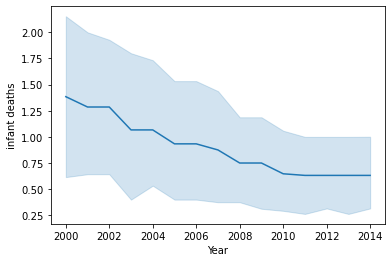

In [113]:
sns.lineplot(x = 'Year', y = 'infant deaths', data = df_status_developed)

There is a steep decline in infant deaths in developed countries over the years

<AxesSubplot:xlabel='Year', ylabel='infant deaths'>

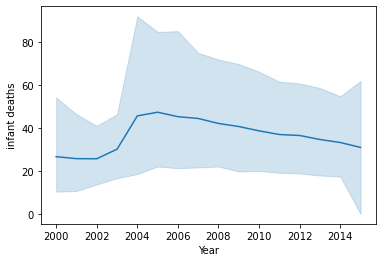

In [114]:
sns.lineplot(x = 'Year', y = 'infant deaths', data = df_status_developing)

There was a hike in infant deaths in year 2004-2005, and it started declining from 2006.

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

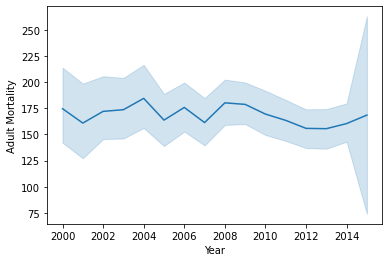

In [131]:
sns.lineplot(x = 'Year', y = 'Adult Mortality', data = df)

Adult mortality was lowest in 2001 and 2012.

<AxesSubplot:xlabel='Year', ylabel='GDP'>

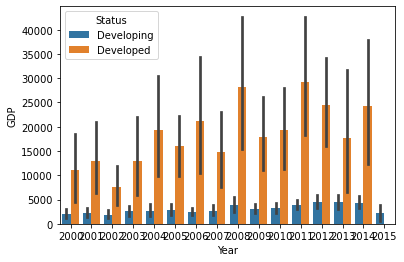

In [134]:
sns.barplot(x = 'Year', y = 'GDP', hue = 'Status', data = df)

GDP of developed countries fluctuates a lot, while GDP of developing countries almost remains constant over the years.

GDP of developing countries is significantly lower than developed countries.

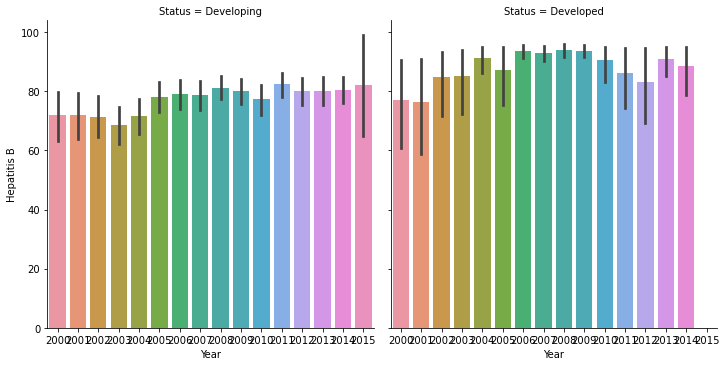

In [149]:
sns.catplot(x = 'Year', y = 'Hepatitis B',col ='Status',kind = 'bar', data = df)

There is not much difference in number of cases of Hepatitis B between developing and developed countries.

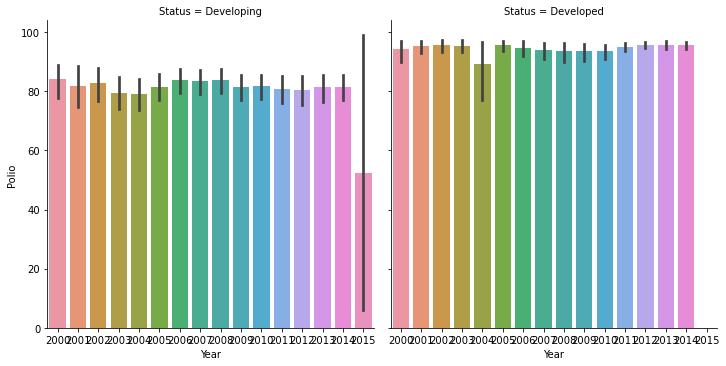

In [154]:
sns.catplot(x = 'Year', y = 'Polio',col ='Status',kind = 'bar', data = df)

Cases of polio are more in developed countries than developing countries

There is sudden drop in cases in 2015 in developing countries, whereas it seems there are either very few cases in 2015 in developed countries or the data is not available.

<AxesSubplot:xlabel='GDP', ylabel='infant deaths'>

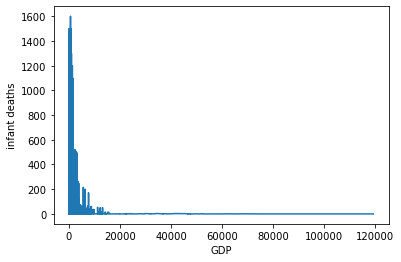

In [167]:
sns.lineplot(x = 'GDP', y = 'infant deaths', data = df)

As GDP of a country increases, the number of infant deaths decreases.

Logistic Regression

In [168]:
df_model = df[['Status','Adult Mortality','infant deaths','Hepatitis B','Polio','GDP']]

In [171]:
df_model_final = pd.get_dummies(data = df_model)

In [185]:
df_model_final

,Adult Mortality,infant deaths,Hepatitis B,Polio,GDP,Status_Developed,Status_Developing
0,263.0,62,65.0,6.0,584.259210,0,1
1,271.0,64,62.0,58.0,612.696514,0,1
2,268.0,66,64.0,62.0,631.744976,0,1
3,272.0,69,67.0,67.0,669.959000,0,1
4,275.0,71,68.0,68.0,63.537231,0,1
...,...,...,...,...,...,...,...
2933,723.0,27,68.0,67.0,454.366654,0,1
2934,715.0,26,7.0,7.0,453.351155,0,1
2935,73.0,25,73.0,73.0,57.348340,0,1
2936,686.0,25,76.0,76.0,548.587312,0,1


In [172]:
df_model_final.columns

Index(['Adult Mortality', 'infant deaths', 'Hepatitis B', 'Polio', 'GDP',
       'Status_Developed', 'Status_Developing'],
      dtype='object')

In [186]:
X = df_model_final[['Adult Mortality', 'Hepatitis B', 'Polio', 'GDP',
       'Status_Developed', 'infant deaths' ]]
y = df_model_final['Status_Developing']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [188]:
clf = LogisticRegression(random_state = 0)

In [189]:
clf.fit(X_train, y_train)

C:\Users\jugvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [198]:
pred = clf.predict(X_test)

In [199]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [200]:
clf.score(X_train, y_train)

0.8991660348749052

In [201]:
clf.score(X_test, y_test)

0.8666666666666667

In [213]:
cm = confusion_matrix(y_true = y_test, y_pred = pred)
cm

array([[ 17,  37],
       [  7, 269]], dtype=int64)

<AxesSubplot:>

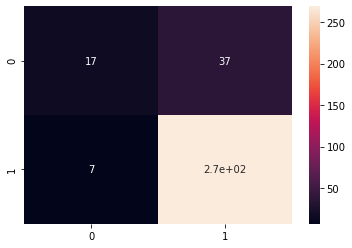

In [227]:
sns.heatmap(cm,annot=True)

True Negative = 17, 
False Negative = 7, 
False Positive = 37, 
True Positive = 269, 

In [214]:
precision_score(y_test,pred)

TypeError: 'tuple' object is not callable

precision = True Positive/(True Positive + False Positive)

It shows the degree to which the estimates from different samples are similar. In other words, out of our predicted values, which ones were actually true shows precision.

In [215]:
recall_score(y_test,pred)

0.9746376811594203

recall =  True Positive/(True Positive + False Negative)

Recall shows how many values we got true out of total true values.

In [216]:
f1_score(y_test,pred)

0.9243986254295532

f1 = 2 { (precision * recall) / (precision + recall) }

In [218]:
sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
sensitivity

0.3148148148148148

Sensitivity shows how many true/positive will actually show up as true/positive

In [220]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.9746376811594203

Specificity shows how many false/negative will actually show up as false/negative

In [247]:
accuracy = accuracy_score(y_test, pred) / y_test.size
mcr = 1 - accuracy
mcr

0.9973737373737374

misclassification rate = (False Negative + False Positive) / (Positive + Negative)

The misclassification rate is a performance metric that tells you the fraction of the predictions that were wrong, without distinguishing between positive and negative predictions.

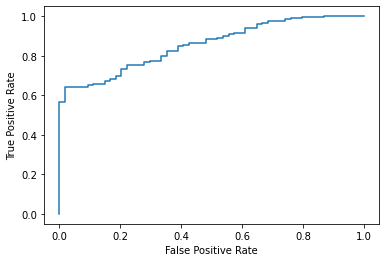

In [235]:
y_pred_prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve visualizes the sensitivity and specificity of a logistic regression model.

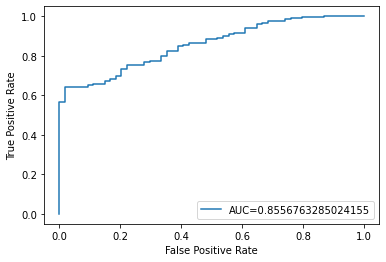

In [237]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

To calculate the area under the curve, we use AUROC.